In [1]:
import requests

#### Getting the html content of a website

http://dataquestio.github.io/web-scraping-pages/ids_and_classes.html

In [2]:
res = requests.get("http://dataquestio.github.io/web-scraping-pages/ids_and_classes.html")

In [3]:
res.text

'<html>\n    <head>\n        <title>A simple example page</title>\n    </head>\n    <body>\n        <div>\n            <p class="inner-text first-item" id="first">\n                First paragraph.\n            </p>\n            <p class="inner-text">\n                Second paragraph.\n            </p>\n        </div>\n        <p class="outer-text first-item" id="second">\n            <b>\n                First outer paragraph.\n            </b>\n        </p>\n        <p class="outer-text">\n            <b>\n                Second outer paragraph.\n            </b>\n        </p>\n    </body>\n</html>'

In [4]:
type(res.text)

str

#### Parsing html

In [7]:
# in case bs4 throws error try
# !pip install --upgrade html5lib==1.0b8

from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'html.parser')

In [6]:
type(soup)

bs4.BeautifulSoup

In [8]:
print(soup.prettify())

<html>
 <head>
  <title>
   A simple example page
  </title>
 </head>
 <body>
  <div>
   <p class="inner-text first-item" id="first">
    First paragraph.
   </p>
   <p class="inner-text">
    Second paragraph.
   </p>
  </div>
  <p class="outer-text first-item" id="second">
   <b>
    First outer paragraph.
   </b>
  </p>
  <p class="outer-text">
   <b>
    Second outer paragraph.
   </b>
  </p>
 </body>
</html>


In [9]:
len(soup.find_all('p'))

4

In [10]:
soup.find_all('p')[1]

<p class="inner-text">
                Second paragraph.
            </p>

In [11]:
soup.find_all('p')[1].text

'\n                Second paragraph.\n            '

In [14]:
len(soup.find_all('p', class_='outer-text'))

2

In [15]:
soup.find_all('p', class_='inner-text')

[<p class="inner-text first-item" id="first">
                 First paragraph.
             </p>,
 <p class="inner-text">
                 Second paragraph.
             </p>]

In [16]:
len(soup.find_all('p', class_='inner-text'))

2

#### Finding the elements of the site

Since every web page is different and html can get very large and messy, the easiest way to find elements that you are interested in is to start from the browser window. So next we will quickly look at how to find elements using the developer tools in your browser. Open the following webpage in your browser (preferably Chrome): http://forecast.weather.gov/MapClick.php?lat=21.3049&lon=-157.8579#.Wkwh8VQ-fVo 

Find the developer tools in your browser. (In Chrome, it's view --> developer --> developer tools or Control+Shift+C on Windows and Command+Shift+C on Mac) You should end up with a panel at the bottom or the right side of the browser like what you see below. Make sure the Elements panel is highlighted:

In [17]:
res = requests.get("http://forecast.weather.gov/MapClick.php?lat=21.3049&lon=-157.8579")
soup = BeautifulSoup(res.text, 'html.parser')

In [18]:
soup

<!DOCTYPE html>

<html class="no-js">
<head>
<!-- Meta -->
<meta content="width=device-width" name="viewport"/>
<link href="http://purl.org/dc/elements/1.1/" rel="schema.DC"/><title>National Weather Service</title><meta content="National Weather Service" name="DC.title"><meta content="NOAA National Weather Service National Weather Service" name="DC.description"/><meta content="US Department of Commerce, NOAA, National Weather Service" name="DC.creator"/><meta content="" name="DC.date.created" scheme="ISO8601"/><meta content="EN-US" name="DC.language" scheme="DCTERMS.RFC1766"/><meta content="weather, National Weather Service" name="DC.keywords"/><meta content="NOAA's National Weather Service" name="DC.publisher"/><meta content="National Weather Service" name="DC.contributor"/><meta content="//www.weather.gov/disclaimer.php" name="DC.rights"/><meta content="General" name="rating"/><meta content="index,follow" name="robots"/>
<!-- Icons -->
<link href="./images/favicon.ico" rel="shortcut 

In [19]:
soup.find_all('p', class_="myforecast-current-lrg")

[<p class="myforecast-current-lrg">73°F</p>]

In [20]:
soup.find_all('p', class_="myforecast-current-lrg")[0]

<p class="myforecast-current-lrg">73°F</p>

In [21]:
type(soup.find_all('p', class_="myforecast-current-lrg")[0])

bs4.element.Tag

In [22]:
soup.find_all('p', class_="myforecast-current-lrg")[0].text

'73°F'

In [23]:
soup.find_all('p', class_="myforecast-current-sm")[0].text

'23°C'

#### Using dictionary for making queries and collecting response

In [24]:
latlon_dict = {
    'Honolulu':[21.3049, -157.8579],
    'Times Square':[40.757339, -73.985992],
    'Yosemite':[37.8651011, -119.5383294]
}
latlon_dict

{'Honolulu': [21.3049, -157.8579],
 'Times Square': [40.757339, -73.985992],
 'Yosemite': [37.8651011, -119.5383294]}

In [25]:
import time

In [26]:
response_dict = {}
for place,coordinates in latlon_dict.items():
    url = "http://forecast.weather.gov/MapClick.php?lat={}&lon={}".format(
        coordinates[0], coordinates[1])
    print(place)
    print(url)
    resp = requests.get(url)
    time.sleep(3)
    soup = BeautifulSoup(resp.text, 'html.parser')
    temp_C = soup.find_all('p', class_="myforecast-current-sm")[0].text
    response_dict[place] = temp_C

Honolulu
http://forecast.weather.gov/MapClick.php?lat=21.3049&lon=-157.8579
Times Square
http://forecast.weather.gov/MapClick.php?lat=40.757339&lon=-73.985992
Yosemite
http://forecast.weather.gov/MapClick.php?lat=37.8651011&lon=-119.5383294


In [27]:
response_dict

{'Honolulu': '23°C', 'Times Square': '17°C', 'Yosemite': '1°C'}

In [28]:
for place,temperature in response_dict.items():
    print("The current temperature in {} is {}.".format(place, temperature))

The current temperature in Honolulu is 23°C.
The current temperature in Times Square is 17°C.
The current temperature in Yosemite is 1°C.


#### saving dictinaries

In [29]:
import numpy as np

In [30]:
np.save('mydict.npy', response_dict) 

In [31]:
read_dictionary = np.load('mydict.npy', allow_pickle=True).item()

In [32]:
read_dictionary

{'Honolulu': '23°C', 'Times Square': '17°C', 'Yosemite': '1°C'}

In [33]:
type(read_dictionary)

dict

### 1 - exercise

We need the zip codes of the 5 landmarks in our data. Fortunatelly Google shows the zip codes at a fixed place if using the right searchphase. <br>
Open this link and using the Inspect tool in the browser try to find the class of the HTML element of a zip code shown at the top of the page! <br> 
https://www.google.com/search?q=San+Jose+zip+code

In [ ]:
# table: div, KKHQ8c
#div class="bVj5Zb FozYp"

### 1 - check yourself

The zip code is under a div of class "title" inside a div of class "junCMe"

### 2 - exercise
Now use the requests library to get the html content of this page and create a BeautifulSoup object called soup from this content

<!DOCTYPE html>
<html lang="hu"><head><meta charset="utf-8"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>San Jose zip code - Google-keresés</title><script nonce="KeN1UojEkNokKni5MsVSBA==">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){
var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=windo
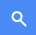

In [37]:
import requests
from bs4 import BeautifulSoup
headers = {'Cookie':'CONSENT=YES+cb.20210418-17-p0.it+FX+917;'}

res = requests.get('https://www.google.com/search?q=San+Jose+zip+code', headers = headers )
soup = BeautifulSoup(res.text, 'html.parser')
soup

### 2 - check yourself

In [38]:
if type(soup) == BeautifulSoup and '94089' in soup.text:
    print('Your soup object is correct')
else:
    print('Your soup object is NOT correct')

Your soup object is correct


### 3 - exercise
Try to find all the div elements of class IAznY in your soup object. How many are there?

In [39]:
elements = soup.find_all('div', class_='IAznY')
len(elements) # 0

0

### 3 - check yourself
If you haven't found any div of this class you were right.

### 4 - exercise
So it looks like that the scraped HTML code doesn't have the elements you saw in the browser. The reason is that when opening the url in the browser, it uses JavaScript to format the page, but when we scraped it, only the plaine HTML was sent. <br><br>
To see the same content in the browser disable JavaScript usage by following this directions:  https://productforums.google.com/forum/#!msg/chrome/BYOQskiuGU0/dO592rlLbJ0J). <br><br>
Then open the page again and find using the Inspect tool find the HTML elemnt containg the zip code!

In [ ]:
# ('div',  class_='BNeawe deIvCb AP7Wnd')

### 4 - check yourself

Each zip code is under a div of class "BNeawe deIvCb AP7Wnd"

### 5 - exercise
Try to find all the div elements of class "BNeawe deIvCb AP7Wnd" in your soup object. How many are there?

In [40]:
headers = {'Cookie':'CONSENT=YES+cb.20210418-17-p0.it+FX+917;'}

res = requests.get('https://www.google.com/search?q=San+Jose+zip+code',headers = headers )
soup = BeautifulSoup(res.text, 'html.parser')

len(soup.find_all('div',  class_='BNeawe deIvCb AP7Wnd'))


68

### 5 - check yourself
You should find 69 elements

### 6 - exercise
Make a list called zipcode_list that contains the text from all the "BNeawe deIvCb AP7Wnd" div elements. Keep only those that consist of numbers

In [49]:
### Your code here
zipcode_list = []
for element in soup.find_all('div',  class_='BNeawe deIvCb AP7Wnd'):
    if element.text.isdigit():
        zipcode_list.append(element.text)


### 6 - check yourself

In [50]:
if sorted(zipcode_list)[0] == '94088' and len(zipcode_list) == 66:
    print('Your list is correct')
else:
    print('Your list is NOT correct')

Your list is correct


### 7 - exercise
Read in the weather csv into a pandas dataframe called station. <br>
Create a dictionary called zipcode_dict which keys are the unique values from the landmark column and the value of each key is an empty list. You print the unique values and create the dictionary by hand or as an advanced task, try to create the dictionary without typing any landmark name!

In [79]:
import pandas as pd
station = pd.read_csv('weather.csv')
landmarks = list(station['landmark'].unique())
zipcode_dict = dict.fromkeys(landmarks, [])

# Check
zipcode_dict.keys()


dict_keys(['San Francisco', 'Palo Alto', 'Mountain View', 'San Jose', 'Redwood City'])

### 7 - check yourself

In [62]:
if sorted(list(zipcode_dict.items())) == [('Mountain View', []),
                                         ('Palo Alto', []),
                                         ('Redwood City', []),
                                         ('San Francisco', []),
                                         ('San Jose', [])]:
    print('Your dictionary is correct')
else:
    print('Your dictionary is NOT correct')

Your dictionary is correct


### 8 - exercise
Loop the keys from the zipcode_dict and for each key print the url you would use to search the zip codes of a given city in google by using string formatting. <br>
For example if the city is Palo Alto the url should be: <br>
https://www.google.com/search?q=Palo Alto zip code

In [72]:
for city in list(zipcode_dict.keys()):
    url='https://www.google.com/search?q={} zip code'.format(city)
    print(url)


https://www.google.com/search?q=San Francisco zip code
https://www.google.com/search?q=Palo Alto zip code
https://www.google.com/search?q=Mountain View zip code
https://www.google.com/search?q=San Jose zip code
https://www.google.com/search?q=Redwood City zip code


### 9 - exercise
Similarly as before, loop the keys from the zipcode_dict and for each key inside the loop:
- Get a response object to the url you would use to search the zip codes of a given city in google. <br>
- Make a soup from that resopnse object. <br>
- Make a list of all zip codes in the soup object. You can find the zip codes as in Exercise 6<br>
- Assign this list as value to the key in the zipcode_dict

In [80]:
for city in list(zipcode_dict.keys()):
    url='https://www.google.com/search?q={} zip code'.format(city)
    res = requests.get(url, headers = headers)
    soup = BeautifulSoup(res.text, 'html.parser')
    zipcode_list = []
    for element in soup.find_all('div',  class_='BNeawe deIvCb AP7Wnd'):
        if element.text.isdigit():
            zipcode_list.append(element.text)
    zipcode_dict[city]=zipcode_list

In [81]:
zipcode_dict

{'San Francisco': ['94016',
  '94102',
  '94103',
  '94104',
  '94105',
  '94107',
  '94108',
  '94109',
  '94110',
  '94111',
  '94112',
  '94114',
  '94115',
  '94116',
  '94117',
  '94118',
  '94119',
  '94120',
  '94121',
  '94122',
  '94123',
  '94124',
  '94125',
  '94126',
  '94127',
  '94129',
  '94130',
  '94131',
  '94132',
  '94133',
  '94134',
  '94137',
  '94139',
  '94140',
  '94141',
  '94142',
  '94143',
  '94144',
  '94145',
  '94146',
  '94147',
  '94151',
  '94153',
  '94154',
  '94156',
  '94158',
  '94159',
  '94160',
  '94161',
  '94162',
  '94163',
  '94164',
  '94171',
  '94172',
  '94177',
  '94188'],
 'Palo Alto': ['94020',
  '94022',
  '94024',
  '94028',
  '94301',
  '94302',
  '94303',
  '94304',
  '94306',
  '95033'],
 'Mountain View': ['94039',
  '94040',
  '94041',
  '94042',
  '94043',
  '94085',
  '94303'],
 'San Jose': ['94088',
  '94089',
  '94560',
  '95002',
  '95008',
  '95013',
  '95035',
  '95037',
  '95050',
  '95054',
  '95101',
  '95103',
  '

### 9 - check yourslef

In [82]:
if sorted([len(x) for x in zipcode_dict.values()]) == [6, 7, 10, 56, 66]:
    print('Your dictionary is correct')
else:
    print('Your dictionary is NOT correct')

Your dictionary is correct
